# Clustering with K-means

The goal of unsupervised learning in Machine Learning is to discover hidden structure or patterns in unlabeled training data. We use Clustering as one of the means to discover structure in unlabeled data. Clustering, or cluster analysis, involves grouping observations such that members of the same group, or cluster, are more similar to each other by a given metric than they are to the members of the other clusters.

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [2]:
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(3.5, 4.5, (2, 10))

In [3]:
cluster1

array([[0.51675665, 0.62334085, 0.93214431, 1.20581687, 1.09204987,
        0.63432106, 0.87538133, 0.63824014, 1.22708543, 1.38443447],
       [1.261354  , 0.55407035, 0.59916013, 1.22974659, 0.72445974,
        0.81495956, 1.05592359, 0.56504281, 0.86222798, 1.43486114]])

In [4]:
cluster2

array([[3.63584587, 3.63422093, 4.27107821, 3.8860225 , 3.95091086,
        4.28948347, 4.35510685, 4.45401998, 3.86414129, 4.42355205],
       [3.75532293, 4.08547048, 3.71376879, 3.57868606, 3.73389348,
        3.58175525, 3.80219845, 4.45761805, 4.17246658, 3.67188138]])

In [5]:
X = np.hstack((cluster1, cluster2)).T
X

array([[0.51675665, 1.261354  ],
       [0.62334085, 0.55407035],
       [0.93214431, 0.59916013],
       [1.20581687, 1.22974659],
       [1.09204987, 0.72445974],
       [0.63432106, 0.81495956],
       [0.87538133, 1.05592359],
       [0.63824014, 0.56504281],
       [1.22708543, 0.86222798],
       [1.38443447, 1.43486114],
       [3.63584587, 3.75532293],
       [3.63422093, 4.08547048],
       [4.27107821, 3.71376879],
       [3.8860225 , 3.57868606],
       [3.95091086, 3.73389348],
       [4.28948347, 3.58175525],
       [4.35510685, 3.80219845],
       [4.45401998, 4.45761805],
       [3.86414129, 4.17246658],
       [4.42355205, 3.67188138]])

In [6]:
# iterate values of K from 1 to 10
K = range(1, 10)

K-Means is an iterative process of moving the centers of the clusters, or the centroids, to the mean position of their constituent points, and re-assigning instances to their closest clusters. K indicates the number of clusters to be created.

### Elbow method

We can use the elbow method to estimate the optimal number of clusters.

The value of K at which the improvement to the distortion declines the most is called the elbow.

In [7]:
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

In [8]:
meandistortions

[2.176363896769847,
 0.3858878399406694,
 0.3289249094659581,
 0.2662960439776184,
 0.2288214524524963,
 0.19304455404200016,
 0.1553007229088456,
 0.12635197469787707,
 0.1056871908700803]

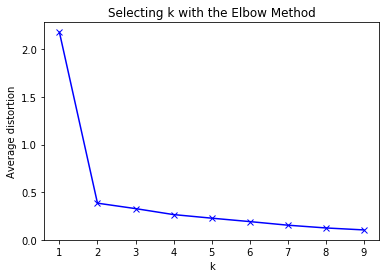

In [9]:
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

The above figure shows the elbow plot for the dataset. The average distortion improves rapidly as we increase K from 1 to 2. There is little improvement for values of K greater than 2

### Adding a 3rd cluster

In [10]:
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(3.5, 4.5, (2, 10))
cluster3 = np.random.uniform(6.5, 8.5, (2, 10))

In [11]:
X = np.hstack((cluster1, cluster2, cluster3)).T
X

array([[1.06995207, 0.61256495],
       [1.3652816 , 1.10784958],
       [1.0799521 , 1.04634981],
       [0.96507781, 0.86027109],
       [1.20604012, 1.24798581],
       [0.91089055, 1.19217028],
       [0.68422223, 1.13535934],
       [1.45748443, 1.2396425 ],
       [0.71882408, 1.00295626],
       [1.11444782, 0.84698118],
       [3.78172435, 3.60029259],
       [3.72541495, 3.9011235 ],
       [4.14148502, 3.54591622],
       [4.4409946 , 3.57663232],
       [3.86653145, 3.77387755],
       [4.0147595 , 3.71123565],
       [4.27529246, 3.70696352],
       [4.01642189, 3.63391303],
       [4.01250165, 4.00219142],
       [4.20540094, 3.80406875],
       [8.38247782, 6.8597803 ],
       [7.45496018, 6.82763895],
       [6.51071416, 8.05784513],
       [6.78030359, 8.06802544],
       [6.73340358, 7.12595727],
       [6.72385148, 7.52025483],
       [8.34282746, 6.64184348],
       [8.26372454, 8.25044995],
       [8.25689854, 7.7502478 ],
       [7.40676548, 7.9985793 ]])

In [12]:
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

In [13]:
meandistortions

[3.2143048309845472,
 1.648940817479115,
 0.47032161412495366,
 0.360289544854908,
 0.30717400448485005,
 0.2706558884024795,
 0.24292684375536985,
 0.21341011372468235,
 0.18839988033774152]

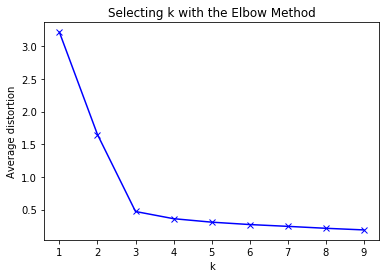

In [14]:
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

From this, we can see that the rate of improvement to the average distortion declines the most when adding a fourth cluster, that is, the elbow method confirms that K should be set to three for this dataset.

### References

1. Mastering Machine Learning with scikit-learn by Gavin Hackeling
